# Cours n°1 - semaine 4

### Deep NN à L couches

Dans un réseau Deep learning à L couches, quand on compte le nombre de couches du réseau, il faut tenir compte de la couche de sortie L.

Exemple: soit un réseau NN (Neural Networks) avec L = 4 couches
On a 3 couches cachées + la couche de sortie, ce qui donne 3 + 1 = L.<br>On note $n^{[l]}$ le nombre de neurones de la couche $l$

La couche d'entrée est celle d'indice 0.<br>Et on aura $n^{[0]}, n^{[1]},n^{[2]}, n^{[3]}$ et $n^{[4]} = n^{[L]} = 1$<br>
avec : $n^{[0]} = n_x$ nombre de features de la couche d'entrée   et $n^{[4]} = n^{[L]} = 1$
    
Les activations de la couche $l$ sont notées $a^{[l]}$

$$a^{[l]} = g^{[l]}(z^{[l]})$$ avec $W^ {[l]}$ et $b^{[l]}$ qui sont les poids qui servent à calculer $z^{[l]}$<br>
On note : $x = a^{[0]}$ et $\hat{y} = a^{[L]}$

### Forward propagation dans un NN

Pour le cas de la Forward propagation, on va d'abord traiter du cas d'une seule observation, ensuite le cas de la vectorisation
sera abordée avec tous les exemples d'apprentissage.<br>
On part de la couche d'entrée, des variables ou features "x". Dans notre cas, nous avons 3 features x1, x2 et x3.

On calcule  $z^{[1]} = W^{[1]}x + b^{[1]}$, on utilise des minuscules pour z et a car on est dans le cas d'une seule observation.
Puis : $a^{[1]} = g^{[1]}(z^{[1]})$<br>

Pour la couche 2:<br>
$$z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$$ et $$a^{[2]} = g^{[2]}(z^{[2]})$$<br>
Pour la couche 3:<br> 
    $$z^{[3]} = W^{[3]}a^{[2]} + b^{[3]}$$ et $$a^{[3]} = g^{[3]}(z^{[3]})$$<br>
Pour la couche 4:<br> 
    $$z^{[4]} = W^{[4]}a^{[3]} + b^{[4]}$$ et $$a^{[4]} = g^{[4]}(z^{[4]})$$<br>

In [5]:
# %%html
# <img src="images/NN_4_layers.png<" style="width:600px;height:350px;">
# NE FONCTIONNE PAS

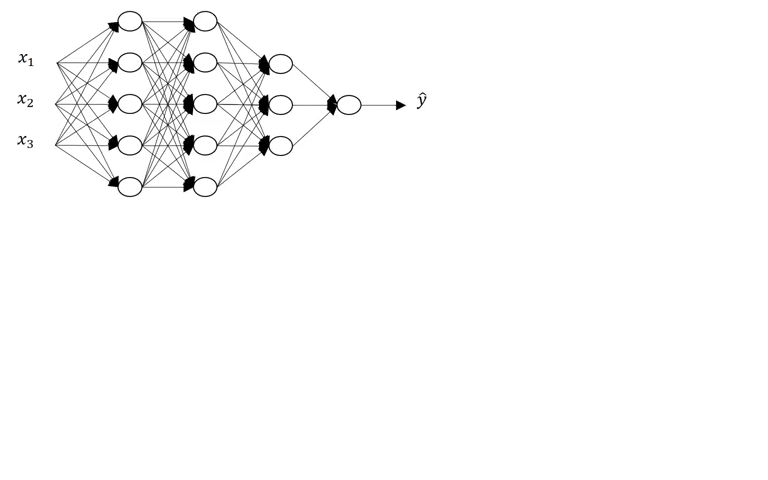

In [1]:
from IPython.display import Image
Image(filename='images/NN_4_layers.png') 
# from PIL import Image
# path = "images/NN_4_layers.png"
# display(Image.open(path))

# Les 2 syntaxes ci-dessus fonctionnent

On est dans le cas d'un réseau NN à 4 couches, ci-dessous le réseau:<br>
<img src="NN_4_layers.png" style="width:600px;height:350px;"> 
mettre la photo du réseau !!!

La règle générale pour la couche $l$, va être :<br>
    $$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$$<br>
    $$a^{[l]} = g^{[l]}(z^{[l]})$$

### Forward propagation avec vectorisation

Pour la vectorisation, cette fois on va avoir avec m exemples d'apprentissage en utilisant des majuscules pour "z" et "a":<br>
$$Z^{[1]} = W^{[1]}X + b^{[1]}$$ et $$A^{[1]} = g^{[1]}(Z^{[1]})$$  avec : $X = A^{[0]}$<br>           
$$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$$ et $$A^{[2]} = g^{[2]}(Z^{[2]})$$<br>

En fait, les "z" pour une observation peuvent être mis côte à côte de manière à obtenir la matrice $Z^{[2]}$:

$$Z^{[2]} = \begin{bmatrix} 
| & | & ... & | \\ 
z^{[2](1)} & z^{[2](2)} & ... & z^{[2](m)} \\ 
| & | & ... & |  
\end{bmatrix}$$<br>

Remarque:<br>le nombre de lignes de cette matrice est égal à $n^{[2]}$ = nombre de neurones de la couche n°2, ...
En continuant jusqu'à la couche n°4, on a :    
$$Z^{[4]} = W^{[4]}A^{[3]} + b^{[4]}$$ et $$A^{[4]} = g^{[4]}(Z^{[4]})$$<br>
Et on note $$\hat{Y} = g(Z^{[4]}) = a^{[4]}$$<br>

Ce qui donne comme règle générale : <br>
    $$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$$<br>
    $$A^{[l]} = g^{[l]}(Z^{[l]})$$
avec : $A^{[0]} = X$<br>    

Ensuite, la règle générale peut être appliquée pout $l=1,...,4$<br>
Cette fois, on sera obligé d'appliquer une boucle for.

### Il est important de bien définir les dimensions des matrices.
Ci-dessous un réseau NN à 5 couches:

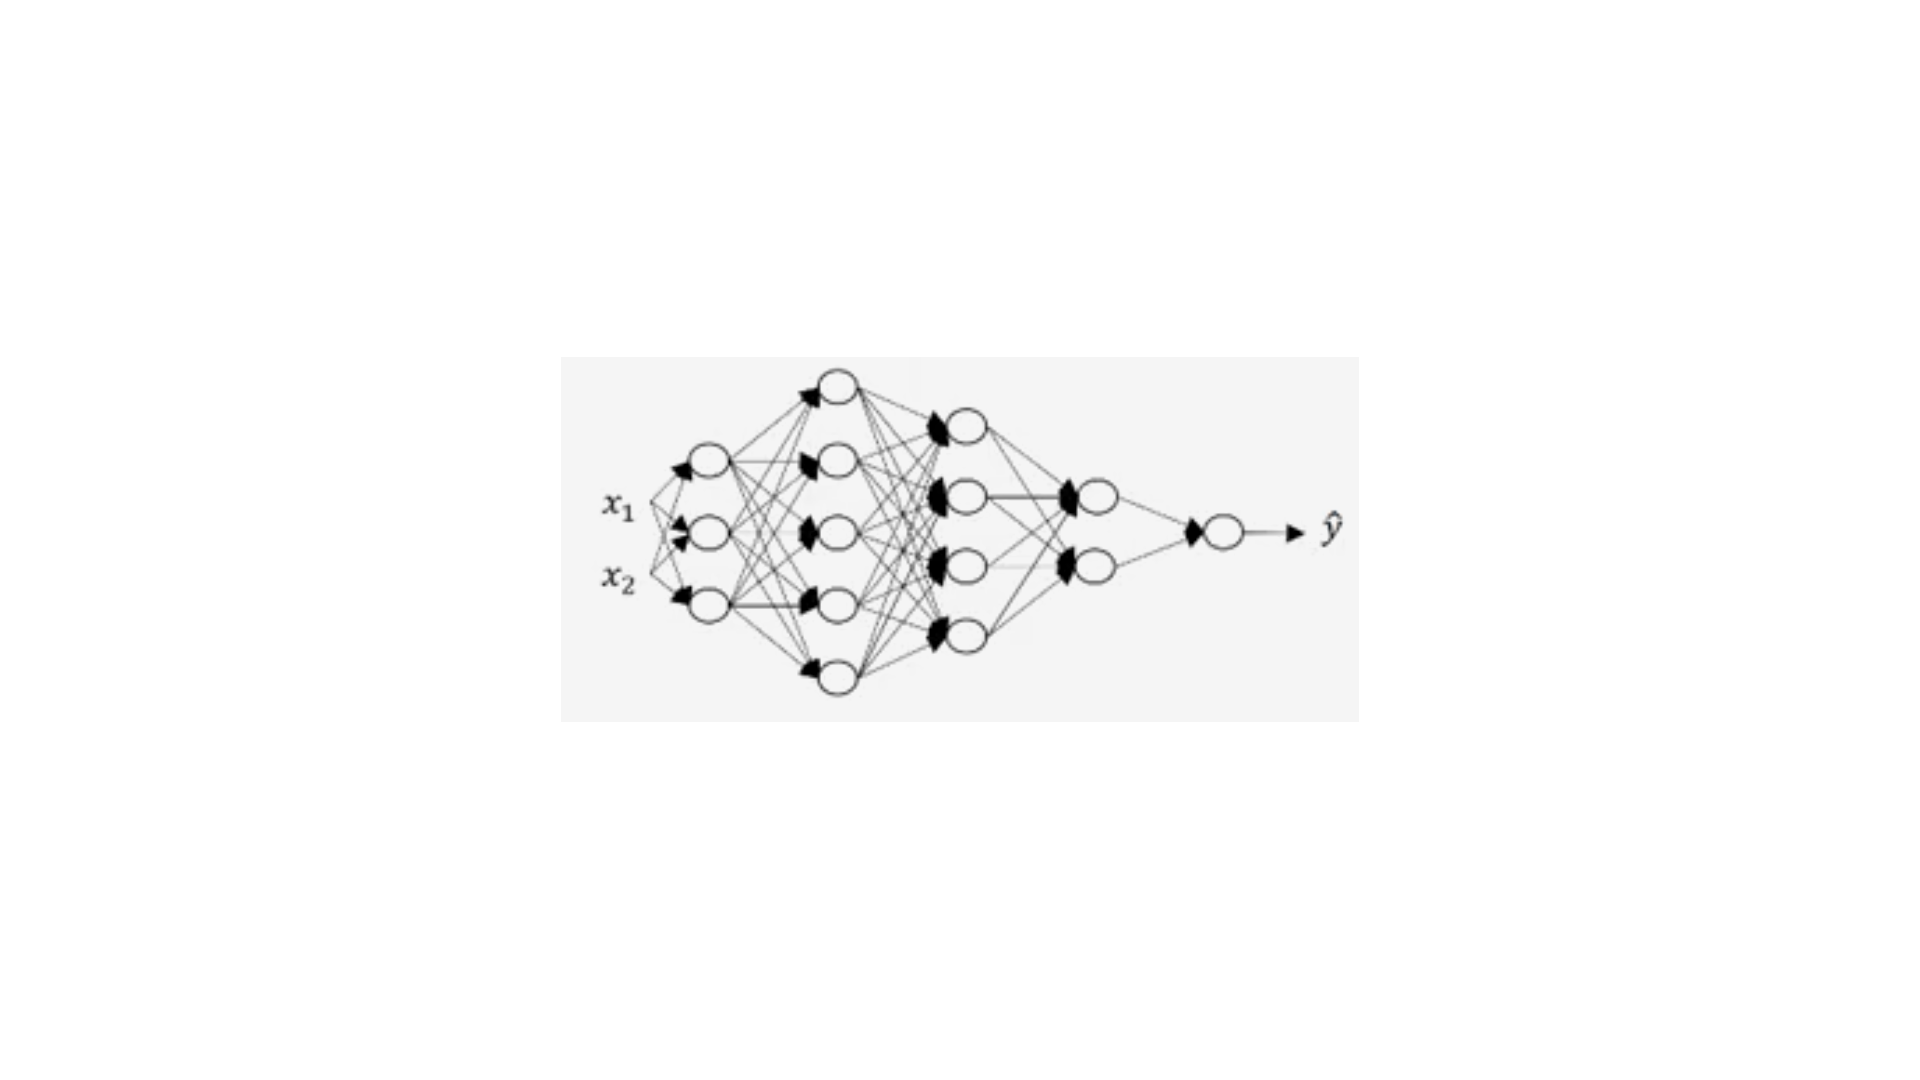

In [29]:
from IPython.display import Image
Image(filename='images/NN_5_layers.png') 

Considérons la couche 1 pour le cas d'une seule observation :
on a : 
    $z^{[1]} = W^{[1]}x + b^{[1]}$<br>
    
avec $z^{[1]}$ qui est de dimension $(3,1)$ et $x$ qui est de dimension $(2,1)$<br>
Pour que le produit $W^{[1]}x$ soit possible, il faut alors que $W^{[1]}$ soit de dimension $(3,2)$<br>
Autrement dit que $W^{[1]}$ soit de dimension $(n^{[1]},n^{[0]})$

En raisonnant de la même façon pour la couche 2: 
sachant que $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$<br>
On va en déduire que $W^{[2]}$ est de dimension $(5,3)$, soit de dimension $(n^{[2]},n^{[1]})$

Et aussi on aura :<br>
    $W^{[3]}$ de dimension $(n^{[3]},n^{[2]})$
    $W^{[4]}$ de dimension $(n^{[4]},n^{[3]})$
D'où la régle générale :<br>
$W^{[l]}$ de dimension $(n^{[l]},n^{[l-1]})$<br>

Pour ce qui concerne $b^{[l]}$, pour la couche 1 comme il faut ajouter $b^{[1]}$ à $W^{[1]}x$<br>
$b^{[1]}$ sera de même dimension que $z^{[1]}$ donc $b^{[1]}$ sera de dimension $(3,1)$, soit $(n^{[1]},1)$<br>
$b^{[2]}$ sera de dimension $(n^{[2]},1)$<br>
$b^{[3]}$ sera de dimension $(n^{[3]},1)$<br><br>
D'où la régle générale :<br>
$b^{[l]}$ est de dimension $(n^{[l]},1)$<br>

On a donc comme règles générales :<br>
$W^{[l]}$ est de dimension $(n^{[l]},n^{[l-1]})$<br>
$b^{[l]}$ est de dimension $(n^{[l]},1)$

Avec "back propagation", on aura $dw$ et $db$ de mêmes dimensions que $W$ et $b$, d'où:<br>
$dW^{[l]}$ est de dimension $(n^{[l]},n^{[l-1]})$<br>
$db^{[l]}$ est de dimension $(n^{[l]},1)$

De plus, comme : $a^{[l]} = g^{[l]}(z^{[l]})$<br>
    $a^{[l]}$ et $z^{[l]}$ sont de mêmes dimensions 

### Avec la vectorisation

Avec la "vectorisation" ie avec plusieurs exemples d'apprentissage, les dimensions de $W^{[l]}$, $b^{[l]}$, $dW^{[l]}$ et $db^{[l]}$ vont rester les mêmes. Mais les dimensions de $Z^{[l]}$ et $A^{[l]}$ vont changer par rapport $z^{[l]}$ et $a^{[l]}$

On avait pour une observation, pour la couche 1:<br>
    $$z^{[1]} = W^{[1]}x + b^{[1]}$$
avec :<br>
     $z^{[1]}$ de dimension $(n^{[1]},1)$, $W^{[1]}$ de dimension $(n^{[1]},n^{[0]})$ de dimension, $x$ de dimension $(n^{[0]},1)$ et $b^{[1]}$ de dimension $(n^{[1]},1)$
    

Si on  m observations, on l'écriture matricielle :<br>
    $Z^{[1]} = W^{[1]}X + b^{[1]}$
    avec $Z^{[1]}$ qui s'écrit :<br><br>
    $Z^{[1]} = \begin{bmatrix} 
| & | & ... & | \\ 
z^{[1](1)} & z^{[1](2)} & ... & z^{[1](m)} \\ 
| & | & ... & |  
\end{bmatrix}$<br>

Cette fois les dimensions sont:<br> 
$(n^{[1]},n^{[0]})$ pour $W^{[1]}$,
$(n^{[0]},m)$ pour $X$,
$(n^{[1]},1)$ pour $b^{[1]}$ 

Le produit $W^{[1]}X$ est alors de dimension $(n^{[1]},m)$<br>
Et avec la technique du "broadcasting" de Python, $b^{[1]}$ va être dupliqué de manière à avoir $b^{[1]}$ sous la forme d'une matrice de dimension $(n^{[1]},m)$
puis ajoutée élément par élement à $W^{[1]}X$<br>

On vait $z^{[l]}$ et $a^{[l]}$ de dimensions $(n^{[l]},1)$.<br>
Maintenant, $Z^{[l]}$ et $A^{[l]}$ sont de dimensions $(n^{[1]},m)$

Notons le cas particulier $l =0$ avec $A^{[0]} = X$ de dimension $(n^{[0]},m)$

De plus : $dZ^{[l]}$ et $dA^{[l]}$ sont aussi de dimensions $(n^{[1]},m)$

### On peut aussi se poser la question qu'entend on par réseaux de neurones "profonds" ?

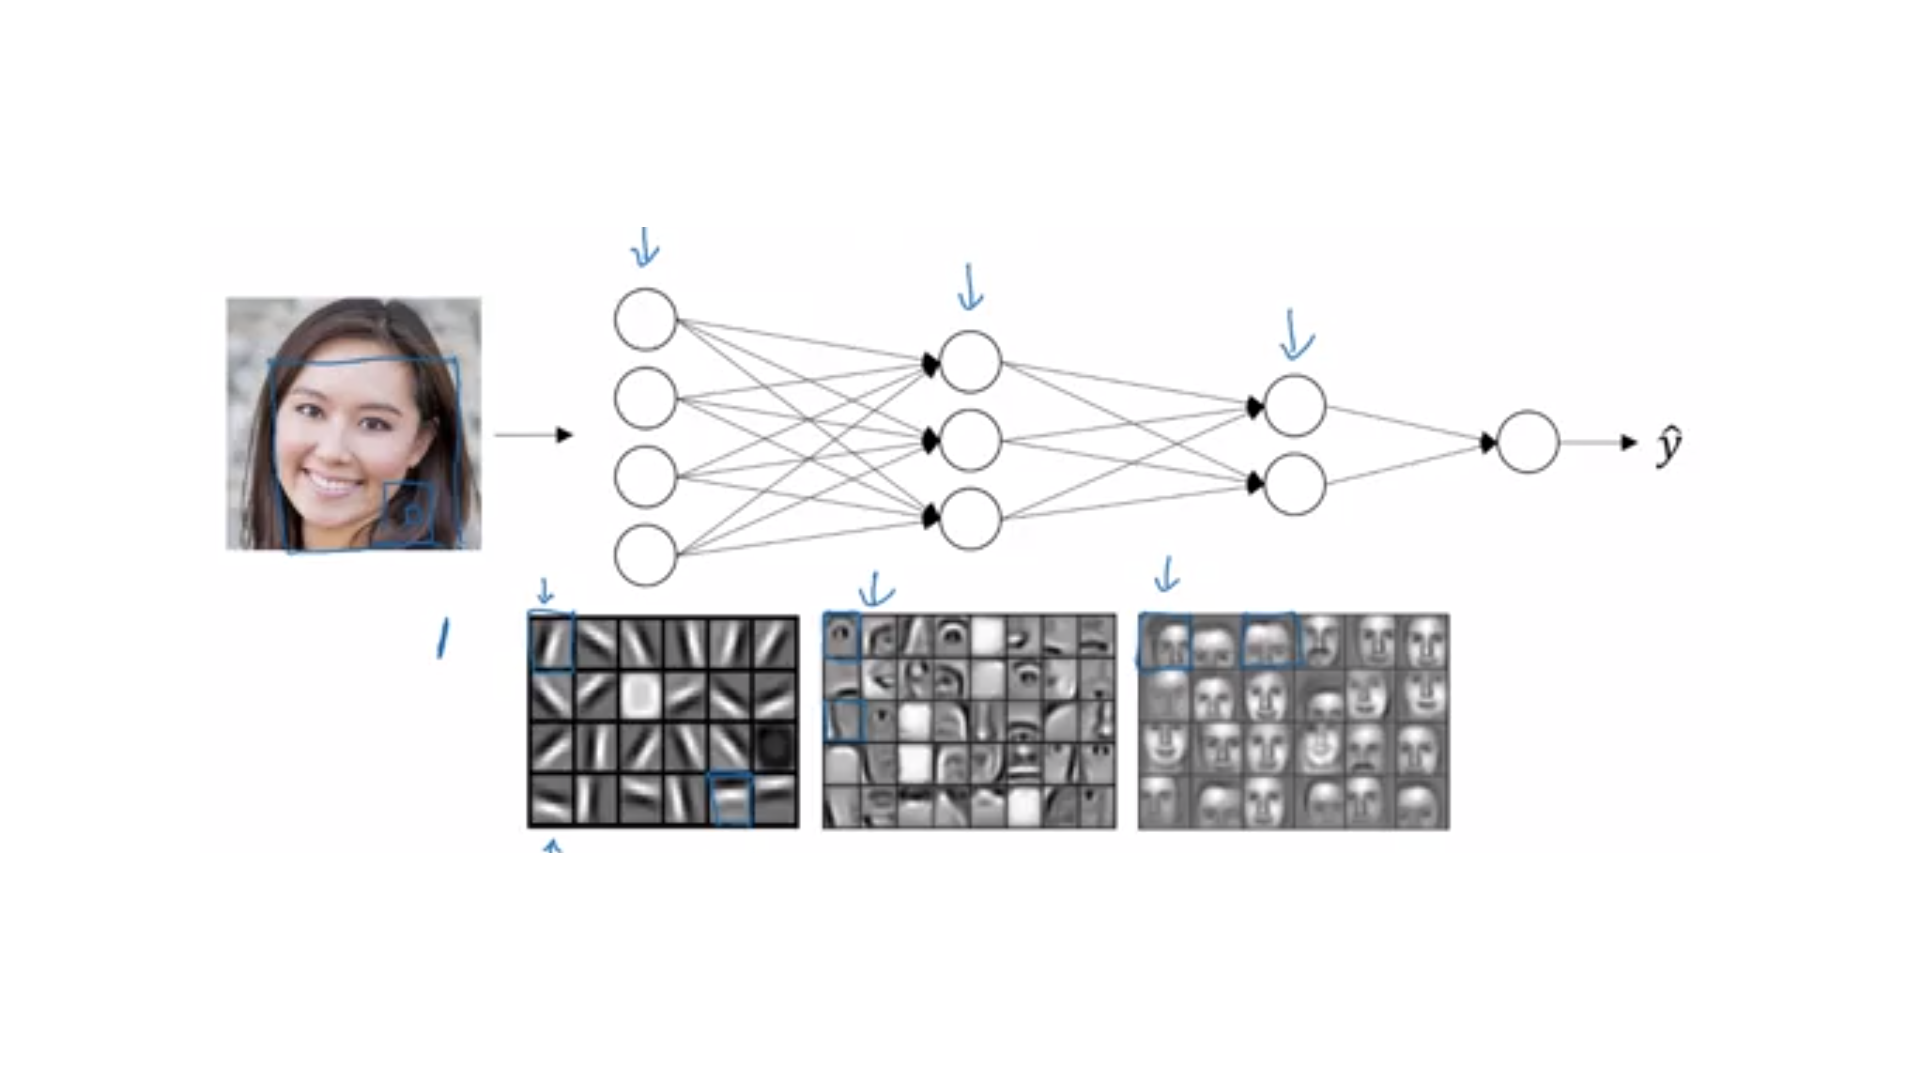

In [34]:
from IPython.display import Image
Image(filename='images/deep_features_images.png') 

Pourquoi faut-il que les NN possèdent beaucoup de couches cachées ?<br>La 1ère couche va permettre de détecter des features ou des "edges"<br> 
Par exemple si on fait de l'apprentissage d'images, une image sur la 1ère couche peut se décomposer en neurone représentant un feature ou "edge" ayant une orientation verticale
et en neurone représentant un feature ou "edge" ayant une orientation horizontale.Sachant qu'on pourrait avoir par exemple 20 neurones cachés pour la 1ère couche cachée.

Sur la couche suivante, le NN peut alors regrouper et utiliser les "edges" pour former des parties d'un visages grâce aux différents neurones de la 2ème couche<br>
Et enfin, le NN va construire via les neurones finaux les différents types de visage !

On verra cela plus concrètement avec les Convolutional NN<br>
Autre exemple que les images:<br>
    Pour l'audio, la 1ère couche va détecter des "low level audio form features", cad est-ce que la musique ou le son "monte" ou "descend"? Ou y a t -il du bruit blanc ?
    Ou du "slithering sound" ou du "pitch" ?<br>
Ensuite, le NN va pouvoir détecter des unités basiques de sons, cad des phonèmes (sons "C" ou "A" ou "T")<br>
Afin de reconnaître des mots dans l'enregistrement audio, puis reconnaître des phrases entières !<br><br>

Le but va vraiment être de détecter des simples features, puis des features de plus en plus complexes grâces aux couches suivantes

### Circuit theory

On peut citer le concept de "circuit theory" pour le Deep learning. En effet, utiliser plusieurs couches composées d'un très petit nombre de neurones est plus efficace
que d'utiliser des "shallow NN" (avec un nombre de couches petit mais un grand nombre de neurones)<br>


Appliquer des fonctions "XOR" imbriqués à n features va être équivalent à un NN à une couche avec un très grand nombre de neurones de l'ordre de $2^{n-1}$

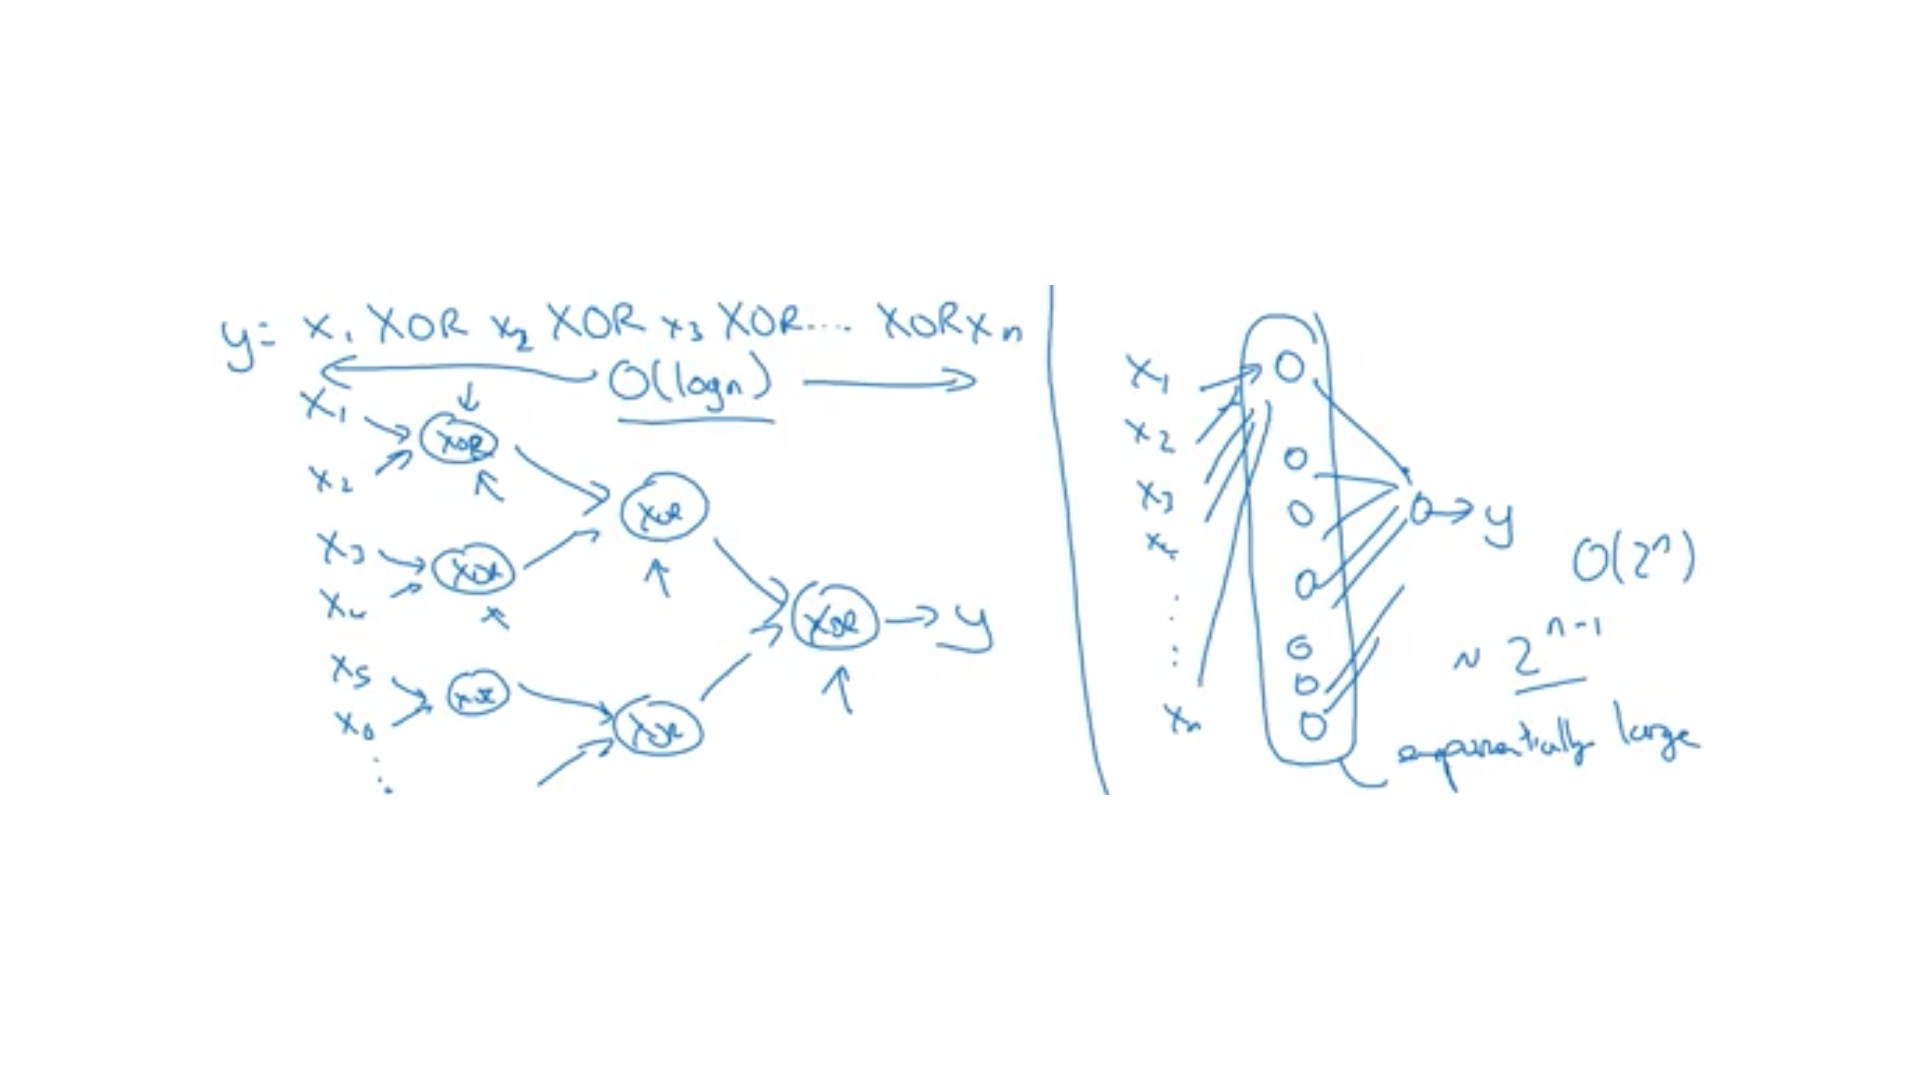

In [36]:
from IPython.display import Image
Image(filename='images/XOR_vs_shallow_NN.png') 

Le réseau de fonctions "XOR" imbriquées va avoir une complexité de calcul algorithmique de l'ordre $O(log(n))$ alors que celle du NN à une couche et $2^{n-1}$ neurones
sera de $O(2^{n})$<br>
Il faut savoir aussi qu'une fonction "XOR" est équivalente à une couche cachée avec certains poids "w"

### Construction de blocs de NN

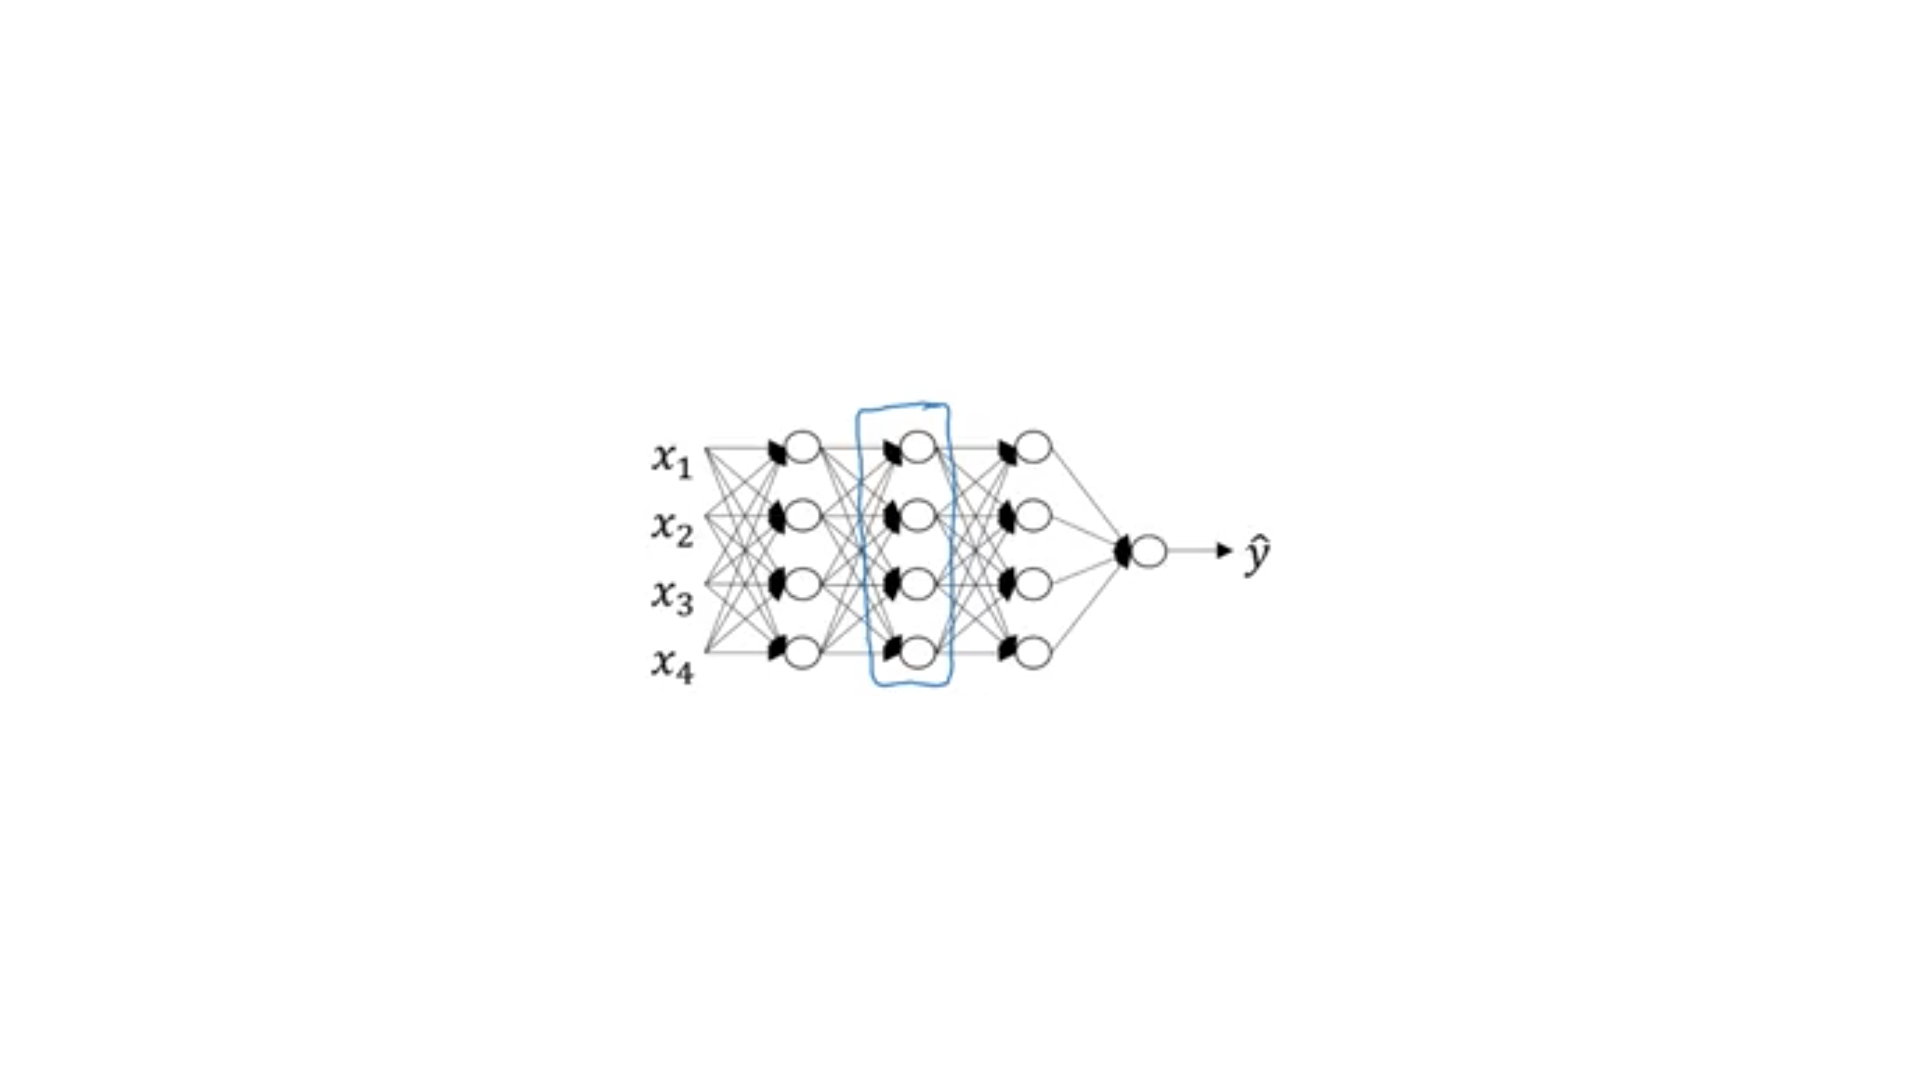

In [37]:
from IPython.display import Image
Image(filename='images/NN_couche_l.png') 

On sait que pour chaque couche $l$:<br>
    Pour "forward propagation", pour une observation :<br>
    $$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$$<br>
    $$a^{[l]} = g^{[l]}(z^{[l]})$$
    
$z^{[l]}$ va être mis en cache car la connaissance des valeurs de $z^{[l]}$ va servir pour l'étape "backward propagation"

Pour "backward propagation", on a :<br>
    la matrice $da^{[l]}$ est connue en entrée ainsi qu'en "cache", $z^{[l]}$ est aussi connue, et en sortie on va calculer :<br>
    $da^{[l-1]}$ ainsi que les matrices $dW^{[l]}$ et $db^{[l]}$

Ainsi ces 2 étapes respectives "forward prop" et "backward prop", sont 2 étapes importantes à implémenter en raisonnant pour une couche $l$ générique

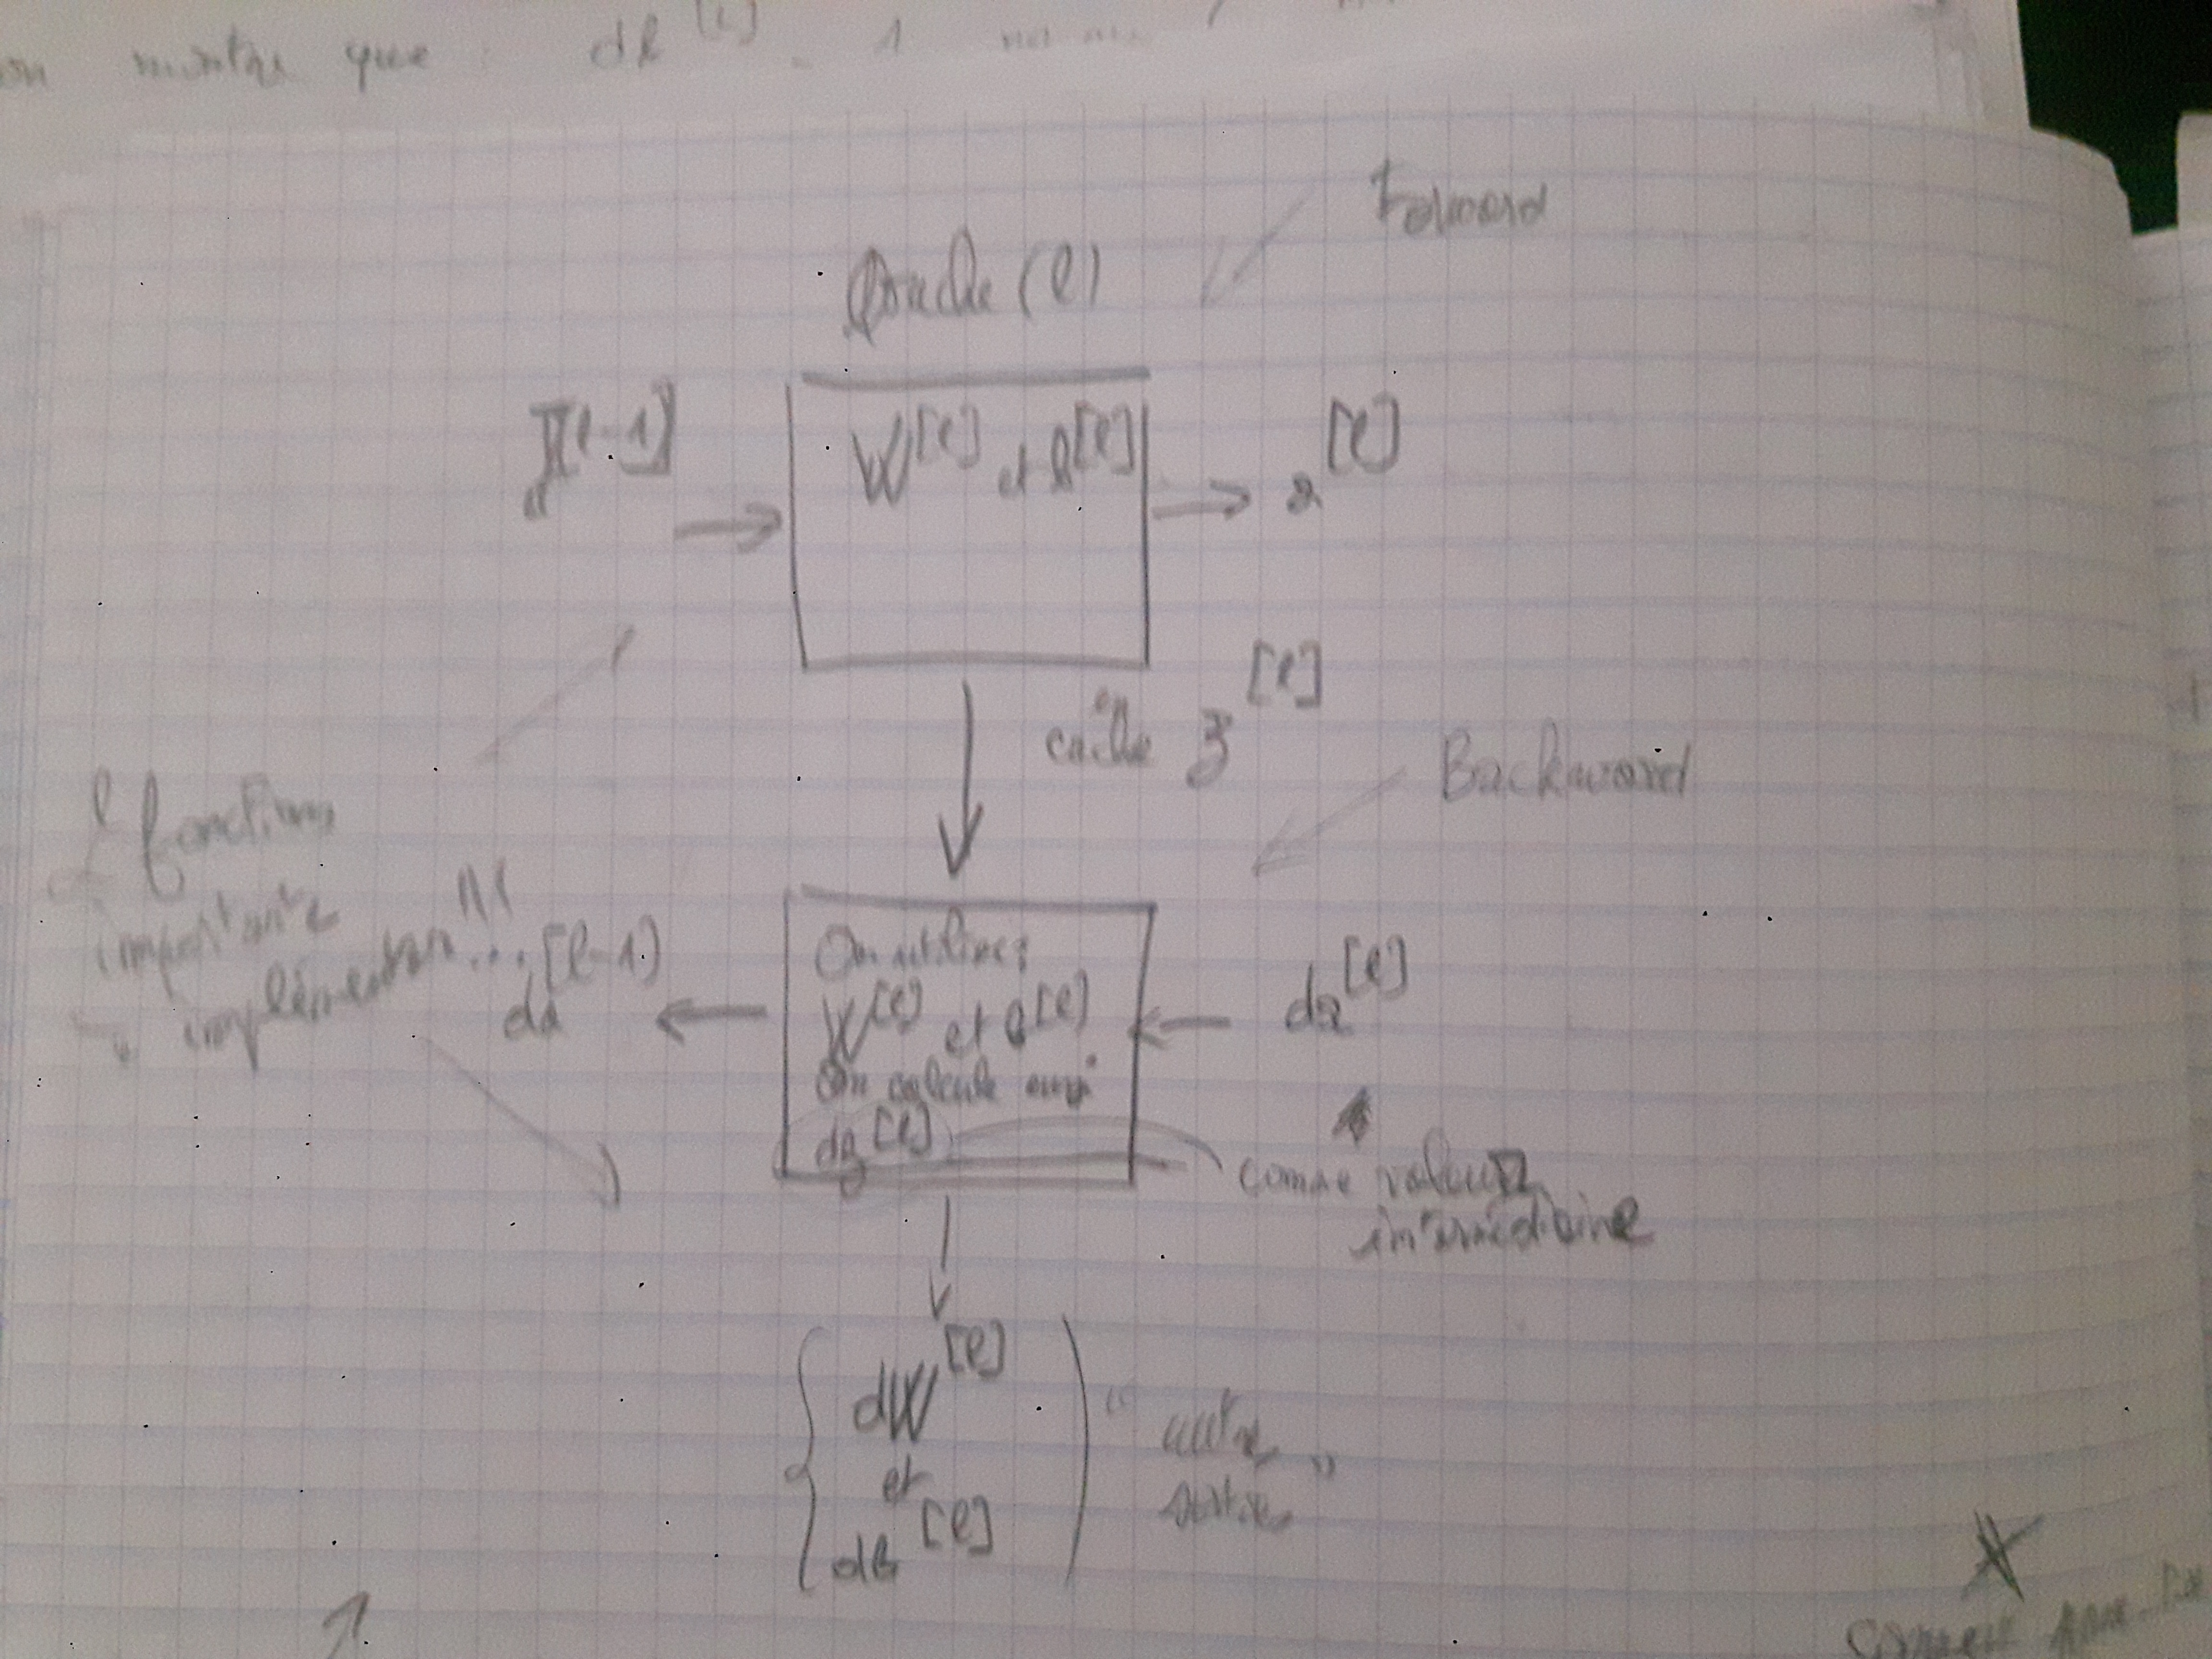

In [1]:
from IPython.display import Image
Image(filename='images/fun_to_implement_forward_backward_couche_l.jpg')

N'oublions pas que la finalité est de calculer pour chaque itération :<br>
toutes les matrices $dW^{[1]}$, $dW^{[2]}$, $dW^{[3]}$, ..., $dW^{[L]}$ 
                    $db^{[1]}$, $db^{[2]}$, $db^{[3]}$, ..., $db^{[L]}$
    
Et de calculer en sortie simultanément:<br>
    $$W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L]}$$
    grâce aux formules:<br>
        $$W^{[l]} :=  W^{[l]} - \alpha dW^{[l]}$$
        $$b^{[l]} :=  b^{[l]} - \alpha db^{[l]}$$

#### Forward propagation pour la couche $l$

##### Pour une observation :
En entrée on a : $a^{[l-1]}$
En sortie on obtient $a^{[l]}$ et aussi $z^{[l]}$ qui sera mis en "cache" suivant :<br>
    $$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$$<br>
    $$a^{[l]} = g^{[l]}(z^{[l]})$$

#### Avec vectorisation avec $m$ observations:
 $A^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$<br>
 $A^{[l]} = g^{[l]} (Z^{[l]})$

#### Backward propagation pour la couche $l$

##### Pour une observation :
En entrée, on a : $da^{[l]}$<br>
En sortie, on a : $da^{[l-1]}$, $dW^{[l]}$ et $db^{[l]}$<br>
On va avoir les 4 formules ci-dessous qui permettent d'aller en arrière ci-dessous !<br>
En calculant d'abord $dz^{[l]}$: <br>
$$dz^{[l]} =  da^{[l]}*g^{[l]^{'}}(z^{[l]})$$ où * désigne le produit élément par élément pour les matrices <br>
$$dW^{[l]} =  dz^{[l]}a^{[l-1]}$$ <br> où $dz^{[l]}a^{[l-1]}$ est un produit de matrices<br>                       
$$db^{[l]} =  dz^{[l]}$$
$$da^{[l-1]} = (W^{[l]})^\top dz^{[l]}$$                                        

Remarque : <br>$dz^{[l]}$ s'écrit en fait:<br>
          $$dz^{[l]} = (W^{[l+1]})^\top dz^{[l+1]} * g^{[l]^{'}}(z^{[l]})$$<br>
avec : $$da^{[l]} = (W^{[l+1]})^\top dz^{[l+1]}$$

##### Avec vectorisation avec  $m$  observations, ci-dessous les 4 formules avec formalisme matriciel :

$$dZ^{[l]} =  dA^{[l]}*g^{[l]^{'}}(z^{[l]})$$ où * désigne le produit élément par élément pour les matrices <br>
$$dW^{[l]} =  \frac{1}{m} dZ^{[l]}(A^{[l-1])^\top} $$ avec $dZ^{[l]}(A^{[l-1])^\top}$ qui est un produit de matrices<br>                    
$$db^{[l]} =  \frac{1}{m} np.sum (dZ^{[l]}, axis = 1, keepdims = True )$$<br>
$$dA^{[l-1]} = (W^{[l]})^\top dZ^{[l]}$$  

On voit que pour calculer toute l'étape "back prop", il faut avoir mis en cache lors de l'étape "forward prop" : <br> 
    $$z^{[l]}, a^{[l-1]}, W^{[l]}, b^{[l]}$$ lorsque on travaille avec une seule observation
Et :<br>
    $$Z^{[l]}, A^{[l-1]}, W^{[l]}, b^{[l]}$$ lorsque on fait de la vectorisation

#### Autre point important : l'initialisation de "back prop" qui se réalise en calculant, pour la couche $L$, le terme $da^{[l]}$ ou $dA^{[l]}$ pour $m$ observations

On montre grâce à l'expression de la fonction de coût pour une observation : $L(\hat{y},y) = -y log(a) - (1 - y) log(1 - a)$:<br>
que : $$da^{[L]} = - \frac{y}{a} + \frac{1-y}{1-a}$$

Ce qui donne pour $m$ observations:<br>
    
$$dA^{[L]} = \begin{bmatrix}  
- \frac{y^{[1]}}{a^{[1]}} + \frac{1-y^{[1]}}{1-a^{[1]}} & - \frac{y^{[2]}}{a^{[2]}} + \frac{1-y^{[2]}}{1-a^{[2]}} & ... & - \frac{y^{[m]}}{a^{[m]}} + \frac{1-y^{[m]}}{1-a^{[m]}} \\  
\end{bmatrix}$$

### Paramètres et hyperparamètres
Par la suite, il faudra bien distinguer les paramètres :<br>
$W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, ..., $W^{[L]}$, $b^{[L]}$<br>
des hyperparamètres:<br>
learning rate $\alpha$<br>
le nombre d'itérations<br>
le nombre de couches cachées L<br>
le nombre de neurones par couche $n^{[1]}$, $n^{[2]}$, $n^{[3]}$, ..., $n^{[L]}$<br>
le choix des fonctions d'activation : Relu, tanh, sigmoid, softmax, ...

Plus tard on verra d'autres hyperparamètres utilisés en Deep learning comme:
Momentum, le "minibatch size" ainsi que différentes formes de régularisation, ...

De plus, le DL est basé sur un process expérimental. Il est difficile de connaître à l'avance les hyperparamètres<br>
Il faut essayer différentes valeurs d'hyperparamètres.

Il faut aussi observer comment décroît la fonction de coût J en fonctions du nombre d'itérations 
et s'assurer de la décroissance de J en fonction du nombre d'itérations.

##### Les applications en DL sont les suivantes :<br>
Computer Vision<br>
Speech recognition<br>
NLP<br>
Advertising  application sur données structurées<br>
Web search  application sur données structurées<br>
Recommendations de produits application sur données structurées<br>

Attention : même pour un problème sur lequel on travaille depuis longtemps, un hyperparamètre peut être à changer.
Car un paramétrage technique peut amener à devoir changer un hyperparamètre afin que l'algorithme d'apprentissage reste performant.
Par exemple, le nombre de CPU ou de GPU peut amener une modification d'un hyperparamètre.

#### A propos de l'analogie avec le cerveau :
Il y a vraiment une analogie entre une régression logistique représentée avec un neurone et une fonction sigmoïde et le fonctionnement d'un neurone du cerveau.<br>
Néanmoins, le fonctionnement des neurones au sein du cerveau reste très mystérieux. Et on ne peut pas l'expliquer simplement par un algorithme forward et backward propagation.Son fonctionnment est beacoup
plus complexe. L'analogie avec le neurone humain a été faite au départ pour introduire les NN, mais on ne peut pas vraiment continuer à la faire avec les Deep NN.